# Tesla Project
by Proshun Saha

In [8]:
import os

In [9]:
os.getcwd()


'C:\\Users\\Proshun Saha\\anaconda_projects\\95208b4a-74a4-482c-85ae-5449ee9ac71e'

# Loading the data from the .csv file

In [10]:
import pandas as pd
df = pd.read_csv("TSLA.csv", parse_dates=["Date"])
df.set_index("Date", inplace=True)

# Checking the data

In [19]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000
2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000
2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999
2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999
2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999


In [20]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,639.000000,639.000000,639.000000,639.000000,6.390000e+02,639.000000
mean,543.362885,517.883537,531.004088,531.298030,4.819130e+07,531.298030
std,340.837426,325.395864,333.534448,333.362040,3.579030e+07,333.362040
min,46.896000,44.855999,45.959999,46.285999,9.800600e+06,46.285999
25%,170.258003,162.379997,167.349998,164.783005,2.392195e+07,164.783005
50%,620.409973,595.500000,603.880005,605.130005,3.448900e+07,605.130005
75%,796.584991,767.744995,779.445007,781.304993,6.329725e+07,781.304993
max,1243.489990,1217.000000,1234.410034,1229.910034,3.046940e+08,1229.910034


# Getting visual data from the .csv file

<Axes: xlabel='Date'>

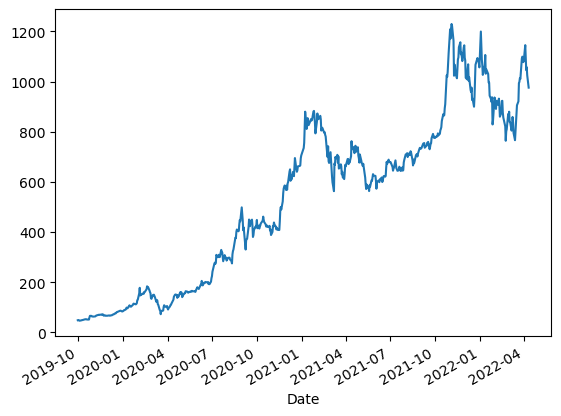

In [21]:
df["Close"].plot()

In [25]:
df["MA_5"] = df["Close"].rolling(window=5).mean()

In [27]:
df["Return"] =df["Close"].pct_change()

In [28]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,MA_5,Return
Date,,,,,,,,
2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000,NaN,NaN
2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000,NaN,0.015859
2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999,NaN,-0.006375
2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999,NaN,-0.041542
2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999,47.725999,-0.006866


# Going to use a simple model to see if everything is working well

We will use Linear Regression at first

In [54]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

In [31]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,MA_5,Return
Date,,,,,,,,
2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000,NaN,NaN
2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000,NaN,0.015859
2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999,NaN,-0.006375
2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999,NaN,-0.041542
2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999,47.725999,-0.006866


In [36]:
df["Close_Yesterday"] = df["Close"].shift(1)
df["MA_5"]=df["Close"].rolling(5).mean(5)

df.head()

,High,Low,Open,Close,Volume,Adj Close,MA_5,Return,CLose_Yesterday,Close_Yesterday
Date,,,,,,,,,,
2019-09-30,48.796001,47.222000,48.599998,48.174000,29399000.0,48.174000,NaN,NaN,NaN,NaN
2019-10-01,49.189999,47.826000,48.299999,48.938000,30813000.0,48.938000,NaN,0.015859,48.174000,48.174000
2019-10-02,48.930000,47.886002,48.658001,48.625999,28157000.0,48.625999,NaN,-0.006375,48.938000,48.938000
2019-10-03,46.896000,44.855999,46.372002,46.605999,75422500.0,46.605999,NaN,-0.041542,48.625999,48.625999
2019-10-04,46.956001,45.613998,46.321999,46.285999,39975000.0,46.285999,47.725999,-0.006866,46.605999,46.605999


In [34]:
# Need to remove rows with NaN

In [37]:
df_model = df.dropna(subset=["Close_Yesterday", "MA_5", "Close"])

In [40]:
X = df_model[["Close_Yesterday", "MA_5"]]
y = df_model["Close"]

display(X)

In [44]:
# Splitting into train/test sets

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y,
    test_size=0.2, # 20% of the data
    shuffle=False # Might shuffle later, keeping this here for now in case I want to use a time series
)

# Time to fit the Linear Model

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#Evaluation using mean squared error
rmse = root_mean_squared_error(y_test, y_pred)

print(f"RMSE: {rmse:.3f}")

RMSE: 40.554


In [59]:
# Pretty high for now, will optimize later

# VISUALIZING RESULTS
The Feature ( closing price yesterday ) and the target

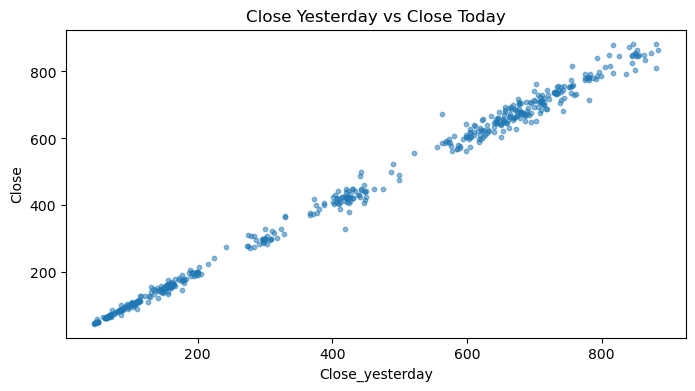

In [63]:
plt.figure(figsize=(8,4))
plt.scatter(X_train["Close_Yesterday"], y_train, s=10, alpha=0.5)
plt.title("Close Yesterday vs Close Today")
plt.xlabel("Close_yesterday")
plt.ylabel("Close")
plt.show()

In [64]:
#Checking the Actual vs Prediction Result


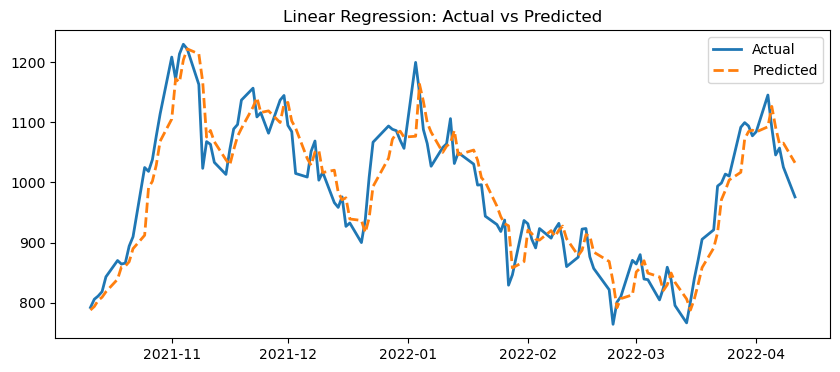

In [75]:
plt.figure(figsize=(10,4))
plt.plot(y_test.index, y_test, label="Actual", linewidth=2)
plt.plot(y_test.index, y_pred, label="Predicted", linewidth=2,linestyle="--")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

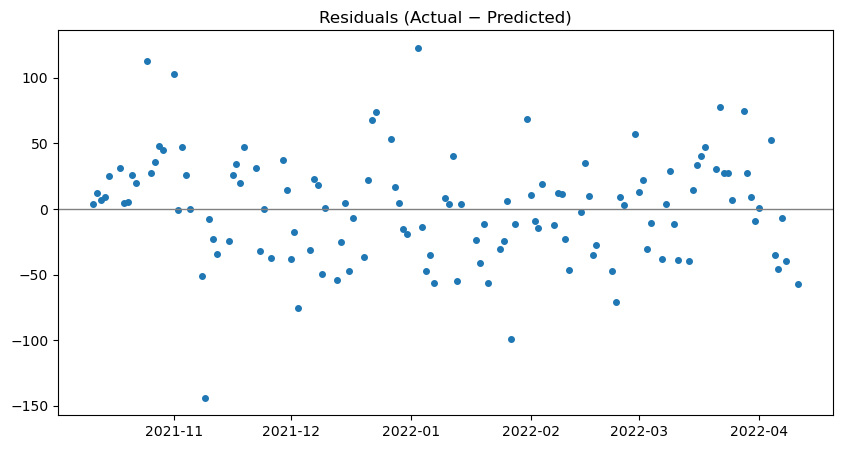

In [73]:
residuals = y_test - y_pred
plt.figure(figsize=(10,5))
plt.plot(residuals.index, residuals, marker="o", ls="", ms=4)
plt.axhline(0, color="gray", lw=1)
plt.title("Residuals (Actual − Predicted)")
plt.show()
